# Algorithmic Methods of Data Mining
## Homework 4
### Group 23: Daniele Mocavini, Alba Puy Tapia,  Marco Scordino

In [1]:
import itertools
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pprint

## Exercise 1

In [2]:
import Modules as hw4

In [3]:
G=hw4.create_graph('full_dblp.json')

In [4]:
print('Our Graph have this info: ', nx.info(G))

Our Graph have this info:  Name: Data Scientist Network
Type: Graph
Number of nodes: 904664
Number of edges: 3679473
Average degree:   8.1345


## Exercise 2

### a)

In [5]:
conf=int(input('Insert a conference id '))
subgraph=hw4.inducted_subgraph(G,conf)

Insert a conference id 4627


The new subgraph have this info

In [6]:
print(nx.info(subgraph))

Name: Data Scientist Network
Type: Graph
Number of nodes: 275
Number of edges: 742
Average degree:   5.3964


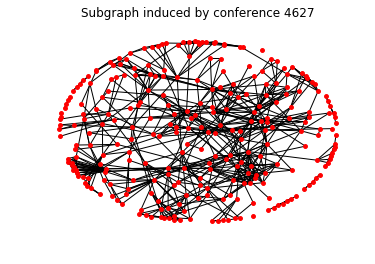

In [7]:
nx.draw_networkx(subgraph, with_labels = False, node_size=15)
limits = plt.axis('off')
plt.title('Subgraph induced by conference %s'%conf)
plt.show()

After having calculated the centrality measurements (degree, closeness, betweeness) for all the nodes, we show a table with the top 20.

In [8]:
centr=hw4.centralities(subgraph)

In [9]:
nodes={'degree':list(centr['degree'].values()),
       'closeness':list(centr['closeness'].values()),
       'betweeness':list(centr['betweeness'].values())}

summary_data = pd.DataFrame(nodes, index=list(centr['closeness'].keys()))
summary_data.head(20)

,betweeness,closeness,degree
206361,0.000000,0.000000,0
240513,0.000561,0.191594,4
20752,0.004182,0.212904,6
3330,0.004182,0.212904,6
364796,0.005864,0.183597,5
158503,0.000000,0.167800,3
21484,0.020522,0.188622,6
15952,0.015604,0.185408,6
21688,0.000000,0.106727,2
114923,0.000000,0.106727,2


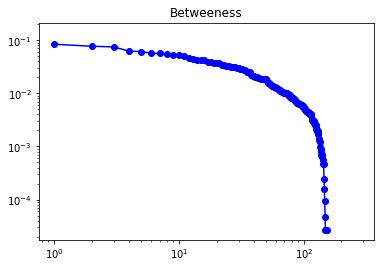

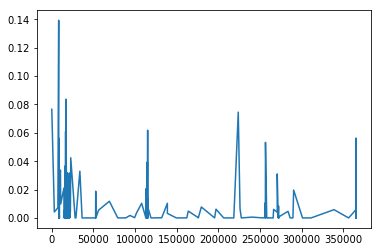

In [10]:
db=sorted(centr['betweeness'].values(), reverse=True)
plt.loglog(db, 'b-', marker='o')
plt.title('Betweeness')
plt.show()
lists = sorted(centr['betweeness'].items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

The Betweenness Centrality is an analytic that determines the influence of a vertex in a graph by measuring the ratio of shortest paths passing through it to the total number of shortest paths between all pairs of vertices. Intuitively, this ratio determines how well a vertex connects pairs of vertices in the network.

The fastest known algorithm for computing betweenness centrality has O(mn) time complexity for graphs with n vertices and m edges. 

In our graph, we can see that the nodes are more represented by the first 35.000 values.

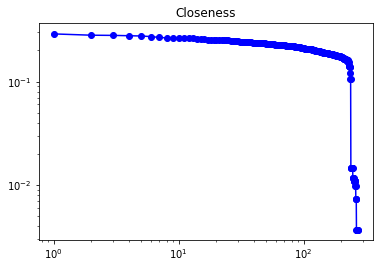

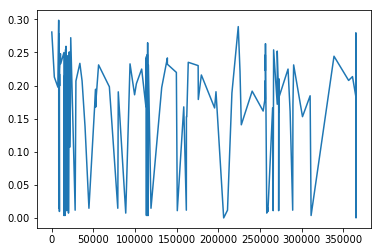

In [11]:
dc=sorted(centr['closeness'].values(), reverse=True)
plt.loglog(dc, 'b-', marker='o')
plt.title('Closeness')
plt.show()
lists = sorted(centr['closeness'].items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()


Closeness centrality measures the mean distance from a vertex to other vertices: the more central a node is, the closer it is to all other nodes. We have to remark that the bigger the value the LESS central the node is (because they are farther away from everyone).

When a node has a low closeness score (i.e., is highly central), it tends to receive anything flowing through the network very quickly. This is because the speed with which something spreads in a network is a function of the number of links in the paths traversed. Since nodes with low closeness scores are close to all nodes, they receive things quickly.

Although being numerically more grouped in the first terms we notice a constantly fluctuating trend.

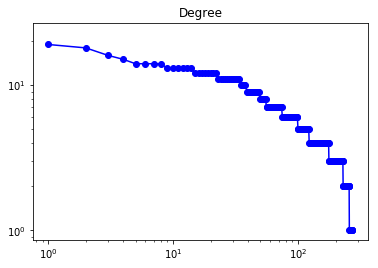

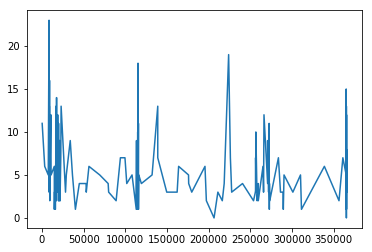

In [12]:
dg=sorted(centr['degree'].values(), reverse=True)
plt.loglog(dg, 'b-', marker='o')
plt.title('Degree')
plt.show()
lists = sorted(centr['degree'].items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

The degree centrality of a node refers to the number of edges attached to the node, it can also be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network.

Also in this case although being numerically more grouped in the first terms we notice a constantly fluctuating trend; furthermore, in the loglog plot we see a trend like a power law distribution.

### b)

In [13]:
aut=int(input('Insert an author id '))
hop=int(input('Insert an integer d '))
ego=hw4.subgraph_inducted_by_author(G,aut,hop)

Insert an author id 20405
Insert an integer d 2


In [14]:
print(nx.info(ego))

Name: Data Scientist Network
Type: Graph
Number of nodes: 644
Number of edges: 2846
Average degree:   8.8385


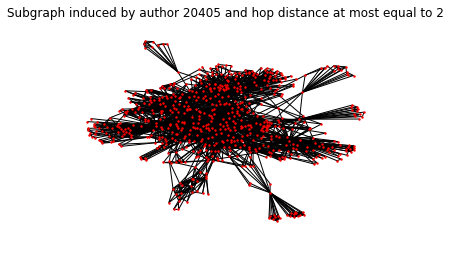

In [16]:
nx.draw_networkx(ego, with_labels = False, node_size=2)
limits = plt.axis('off')
plt.title('Subgraph induced by author %s and hop distance at most equal to %s' %(aut,hop))
plt.show()

## Exercise 3

### a)

Since Aris is our mentor, let's calculate the 'Aris Number' to describe the "collaborative distance" between Aris (id 256176) and other authors, let's start with Stefano Leonardi (id 365188).

In [17]:
original_id = int(input("Please tell me the id of the author you want to connect with Aris: "))
print("Computing the distance between Aris and ", hw4.tell_me_the_name(original_id), " ... ")
destination_id = hw4.tell_me_the_id("aris anagnostopoulos")
sol = hw4.my_dijkstra(G,256176,original_id)
if type(sol) == float:
    print("The shortest path has weight ", sol)
else:
    print("They are not connected, so sorry.")

Please tell me the id of the author you want to connect with Aris: 365188
Computing the distance between Aris and  stefano leonardi  ... 
The shortest path has weight  0.7777777777777778


Computing also for Adriano Fazzone (id 272067) we obtain:

In [18]:
original_id = int(input("Please tell me the id of the author you want to connect with Aris: "))
print("Computing the distance between Aris and ", hw4.tell_me_the_name(original_id), " ... ")
destination_id = hw4.tell_me_the_id("aris anagnostopoulos")
sol = hw4.my_dijkstra(G,256176,original_id)
if type(sol) == float:
    print("The shortest path has weight ", sol)
else:
    print("They are not connected, so sorry.")

Please tell me the id of the author you want to connect with Aris: 272067
Computing the distance between Aris and  adriano fazzone  ... 
The shortest path has weight  0.9473684210526316


And for Mario Frank (id 9451):

In [19]:
original_id = int(input("Please tell me the id of the author you want to connect with Aris: "))
print("Computing the distance between Aris and ", hw4.tell_me_the_name(original_id), " ... ")
destination_id = hw4.tell_me_the_id("aris anagnostopoulos")
sol = hw4.my_dijkstra(G,256176,original_id)
if type(sol) == float:
    print("The shortest path has weight ", sol)
else:
    print("They are not connected, so sorry.")

Please tell me the id of the author you want to connect with Aris: 9451
Computing the distance between Aris and  mario frank  ... 
They are not connected, so sorry.


We note therefore that both Stefano Leonardi and Adriano Fazzone are closely related with Aris (in particular Adriano Fazzone) while there is no connection with Mario Frank.

### b)

![title](wiky.jpg)

Here we ask the user to give us the number of authors he or she wants to define as the set and their names. 

In [21]:
n= int(input("Please tell me the number of authors you are going to give me: "))
l = []
for i in range(n):
    l.append(int(input("Tell me an identifier: ")))
    
group_number = hw4.my_dijkstra_group(G,l)
print("The group number for all the nodes is: ")
pp = pprint.PrettyPrinter(indent=4)
ele={k: v for k, v in group_number.items() if v != None}
first25 = {k: ele[k] for k in list(ele)[:25]}
pp.pprint(first25)

Please tell me the number of authors you are going to give me: 2
Tell me an identifier: 365188
Tell me an identifier: 272067
Computing the distance between  stefano leonardi  and all the other authors... 
Computing the distance between  adriano fazzone  and all the other authors... 
The group number for all the nodes is: 
{   248: 365188,
    287: 365188,
    1304: 365188,
    2730: 365188,
    2979: 365188,
    2980: 365188,
    2981: 365188,
    3079: 365188,
    3981: 365188,
    4017: 365188,
    4689: 365188,
    5364: 365188,
    5587: 365188,
    5619: 365188,
    5620: 365188,
    5661: 365188,
    5799: 365188,
    6958: 365188,
    7132: 365188,
    7179: 365188,
    7180: 365188,
    7181: 365188,
    7182: 365188,
    7224: 365188,
    7424: 365188}
